# Parameters, Imports, and Functions

In [145]:
from torch_geometric.data import Data, DataLoader
import torch
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy
import os

# Fraction of data to be used for train, validation, and test data sets respectively.
train_frac = 8/10
val_frac   = 1/10
test_frac  = 1/10

train_valid_size = 8                      # Size of train and validation sets.
test_size        = train_valid_size  # Size of test set relative to training and validation sets.



#### Functions that return data

# return neuron ids (Shape: [num_neurons])
def get_ids(data, worm_index):
    return np.squeeze(data[worm_index][3])

# return calcium traces (Shape: [num_neurons, timesteps])
def get_trace(data, worm_index):
    return data[worm_index][1].transpose(1,0)

# return derivative of calcium traces (Shape: [num_neurons, timesteps])
def get_diff_trace(data, worm_index):
    return data[worm_index][2].transpose(1,0)

# return states (Shape: [timesteps])
def get_states(data, worm_index):
    return np.squeeze(data[worm_index][7])

# return time in seconds (Shape: [timesteps])
def get_time(data, worm_index):
    return np.squeeze(data[worm_index][4])

# return name of state. <input>: <int> (from 1 to 8)
def get_state_name(data, state):
    return np.concatenate(data[0][8].tolist()[0]).tolist()[state-1]


#### Functions that are used to process unique neurons

# Return a set of uniquely identified neurons.
def unique_id(data, worm_index):
    indices = unique_indices(data, worm_index)
    ids=[]
    for element in get_ids(data, worm_index)[indices].tolist():
        if element[0][0].dtype in ['uint8', '<U1']:
            continue
        if element[0][0] in ['---']:
            continue
        ids.append(np.squeeze(element[0].tolist()).tolist())
    return set(ids)

# Return list of indices of uniquely identified neurons of specified worm.
def unique_indices(data, worm_index):
    indices=[]
    # If the id vector has only 1 element (uniquely identified), append the index to the returned list.
    for i, element in enumerate(get_ids(data, worm_index)):
        if element.size is 1:
            if element[0][0].dtype in ['uint8', '<U1']:
                continue
            if element[0][0] in ['---']:
                continue
            indices.append(i)
    return indices

# Return list of alphabetically sorted list of names of uniquely identified neurons common across all 5 worms.
def get_unique_neurons(data, worm_indices_list):
    # data is a list of data. worm_index is a list of worm's requested where each element is a list
    #   of requested worms.
    neurons = []
    for dataset, worm_indices in zip(data, worm_indices_list):
        neurons.append(set.intersection(*[unique_id(dataset, worm_index-1) for worm_index in worm_indices]))  
    unique_neurons = list(set.intersection(*neurons))
    unique_neurons.sort()
    return unique_neurons

# Return list of indices for uniquely identified neurons (across all worms) of the specified worm.
def unique_neuron_indices(data, all_data, worm_index):
    # all_data includes all datasets that we want unique indices. data is just the dataset we are interested in.
    # Get indices for uniquely identified neurons.
    indices = unique_indices(data, worm_index)
    ids={}
    # Create a dict: {neuron_name: neuron_number} for specified worm.
    for i, element in enumerate(get_ids(data, worm_index)[indices].tolist()):
        ids.update({np.squeeze(element[0].tolist()).tolist():indices[i]})
    # Get alphabetically sorted list of common uniquely identified neurons across all 5 worms.
    unique_neurons = get_unique_neurons(all_data, [np.arange(get_num_worms(element)) for element in all_data])
    # Get list of neuron indices corresponding to basis defined by <unique_neurons>.
    neuron_index = []
    for element in unique_neurons:
        neuron_index.append(ids[element])
    return neuron_index

# Return number:<int> of worms in a dataset.
def get_num_worms(data):
    return int(np.size(data, 0))

#### Functions used to process data

# Return normalized 1D data with range (-1,1).
def normalize_data(data):
    return (data-data.min())*2/(data.max()-data.min())-1

# Return normalized interpolated 1D array. 
# If <noise> is True, adds gaussian noise with zero mean and standard deviation corresponding to noise_factor.
def data_augment(data, noise=False):
    data = normalize_data(data)
    f = scipy.interpolate.interp1d(np.arange(data.shape[0]),data,kind='cubic')
    tr_new =  f(np.arange(interpolation_factor*data.shape[0]-interpolation_factor+1)/interpolation_factor)
    if noise:
        tr_new += np.random.normal(0,noise_factor,tr_new.shape[0])
    return normalize_data(tr_new)

In [3]:
files = ['Kato', 'n2', 'npr1']
path = os.path.abspath('')
data = []
for folder in files:
    data_path = os.path.join('Data_5_States',folder)
    print(data_path)
    with open(data_path,'rb') as file:
        data.append(np.squeeze(pickle.load(file)))

Data_5_States/Kato
Data_5_States/n2
Data_5_States/npr1


In [554]:
tr1 = normalize_data(get_trace(Kato,0)[35,:])
difftr1 = normalize_data(get_diff_trace(Kato, 0)[35,:])

In [4]:
Kato = data[0]
n2   = data[1]
npr1 = data[2]

In [144]:
datasets = [Kato, 
            n2, 
            npr1
           ]
worms    = [np.arange(get_num_worms(Kato)).tolist(),
            np.arange(get_num_worms(n2)).tolist(),
            np.arange(get_num_worms(npr1)).tolist()
           ]
for dataset, worm_indices in zip(datasets, worms):
    neurons.append(set.intersection(*[unique_id(dataset, worm_index-1) for worm_index in worm_indices]))  
unique_neurons = list(set.intersection(*neurons))
unique_neurons.sort()

['OLQDL'] <U5
['URADL'] <U5
['URYVR'] <U5
['URADR'] <U5
['URYVL'] <U5
['URYDL'] <U5
['OLQDR'] <U5
['URYDR'] <U5
['OLQVL'] <U5
['RMEL'] <U4
['RMER'] <U4
['RMED'] <U4
['SMDVL'] <U5
['RID'] <U3
['SMDVR'] <U5
['AVAR'] <U4
['AVAL'] <U4
['RMEV'] <U4
['ASKL'] <U4
['ASKR'] <U4
['AVER'] <U4
['AVEL'] <U4
['ALA'] <U3
['AIBR'] <U4
['RIVL'] <U4
['AVBR'] <U4
['AIBL'] <U4
['RIBR'] <U4
['RIBL'] <U4
['RIVR'] <U4
['RIMR'] <U4
['AVBL'] <U4
['SIBVL'] <U5
['SMDDL'] <U5
['RIML'] <U4
['RIS'] <U3
['SMDDR'] <U5
['VB02'] <U4
['AVFR'] <U4
['AVFL'] <U4
['SABVL'] <U5
['VB01'] <U4
['SABVR'] <U5
['SABD'] <U4
['VA01'] <U4
['AS01'] <U4
['DB01'] <U4
['DA01'] <U4
['OLQDL'] <U5
['URADL'] <U5
['URYVR'] <U5
['URADR'] <U5
['URYVL'] <U5
['URYDL'] <U5
['OLQDR'] <U5
['URYDR'] <U5
['OLQVL'] <U5
['RMEL'] <U4
['RMER'] <U4
['RMED'] <U4
['SMDVL'] <U5
['RID'] <U3
['SMDVR'] <U5
['AVAR'] <U4
['AVAL'] <U4
['RMEV'] <U4
['ASKL'] <U4
['ASKR'] <U4
['AVER'] <U4
['AVEL'] <U4
['ALA'] <U3
['AIBR'] <U4
['RIVL'] <U4
['AVBR'] <U4
['AIBL'] <U4
['R

In [146]:
datasets = [Kato, 
            n2, 
            npr1
           ]
worms    = [np.arange(get_num_worms(Kato)).tolist(),
            np.arange(get_num_worms(n2)).tolist(),
            np.arange(get_num_worms(npr1)).tolist()
           ]
uniq_neuron = get_unique_neurons(datasets, worms)
print(uniq_neuron)

['AIBR', 'AVAL', 'VB02']


# Processing Original Data Code (Archived)

In [59]:
[(i+1,get_state_name(i+1)) for i in range(8)]

TypeError: get_state_name() missing 1 required positional argument: 'state'

In [84]:
with open('Data 5 States/Kato-Original','rb') as file:
    data = np.squeeze(pickle.load(file))

In [89]:
data[1][7][0].min()

1

In [90]:
[print(i+1,data[1][8][0][i]) for i in range(len(data[1][8][0]))]

1 ['FWD']
2 ['SLOW']
3 ['DT']
4 ['VT']
5 ['REV1']
6 ['REV2']
7 ['REVSUS']
8 ['NOSTATE']


[None, None, None, None, None, None, None, None]

In [91]:
# Kato Process states where rev=1,fwd=2,dt=3,vt=4,nostate=5
for i in range(5):
    for j in range(len(data[i][7][0])):
        if data[i][7][0][j] in [1,2]:
            data[i][7][0][j] = 2
        elif data[i][7][0][j]  in [3]:
            data[i][7][0][j] = 3
        elif data[i][7][0][j]  in [4]:
            data[i][7][0][j] = 4
        elif data[i][7][0][j]  in [5,6,7]:
            data[i][7][0][j] = 1
        else:
            data[i][7][0][j] = 5

In [50]:
save_path = os.path.join(os.path.abspath(''), "npr1")
print(save_path)

/home/paul/C Elegans/Kato


In [51]:
pickle.dump(np.squeeze(f['npr1_prelet']), open(save_path, "wb"))

In [4]:
[ get_state_name(i) for i in range(1,9)]

['FWD', 'SLOW', 'DT', 'VT', 'REV1', 'REV2', 'REVSUS', 'NOSTATE']

In [46]:
load_mat = os.path.join('Data 5 States', "npr1_5_states.mat")
print(load_mat)

Data 5 States/npr1_5_states.mat


In [47]:
import scipy.io as sio
f=sio.loadmat(load_mat)

In [49]:
npr1 = np.squeeze(f['npr1_prelet'])

In [50]:
npr1_dat=np.array([(np.squeeze(npr1[i][6]),
                    np.squeeze(npr1[i][0][:-1,:]),
                    np.squeeze(npr1[i][1]),
                    np.squeeze(npr1[i][2]),
                    np.squeeze(npr1[i][3]),
          np.squeeze(npr1[i][4]),np.squeeze(npr1[i][5]),
                    np.squeeze(npr1[i][7][0][0][0])[:-1],
          np.squeeze(npr1[i][7][0][0][1][0])) for i in range(10)])

In [38]:
npr1_dat[0][7].shape

(3720,)

In [95]:
npr1_dat[9][7].max()

4

In [93]:
[print(i, npr1_dat[9][8][i]) for i in range(6)]

0 ['Forward']
1 ['Quiescence']
2 ['Reversal']
3 ['Dorsal turn']
4 ['Ventral turn']
5 ['undefined turn']


[None, None, None, None, None, None]

In [51]:
len(npr1_dat)

10

In [44]:
for i in range(10):
    for k in range(len(npr1_dat[i][7])):
        if npr1_dat[i][7][k] == 0:
            npr1_dat[i][7][k] = 2
        elif npr1_dat[i][7][k] == 1:
            npr1_dat[i][7][k] = 5
        elif npr1_dat[i][7][k] == 2:
            npr1_dat[i][7][k] = 1

In [92]:
save_path = os.path.join(os.path.abspath(''), "Kato")
pickle.dump(data, open(save_path, "wb"))
print(save_path)

/home/paul/C Elegans/Kato


In [167]:
[i for i in range(len(npr1))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [176]:
  npr1[0][7][0][0][1][0]

array([array(['Reversal'], dtype='<U8'), array(['Forward'], dtype='<U7'),
       array(['Quiescence'], dtype='<U10'), array(['Turn'], dtype='<U4')],
      dtype=object)

In [492]:
[print(i,element) for i, element in enumerate(get_ids(Kato, 0))]

0 []
1 []
2 []
3 []
4 []
5 []
6 []
7 []
8 []
9 []
10 []
11 []
12 [[array(['OLQVR'], dtype='<U5') array(['URYVR'], dtype='<U5')]]
13 []
14 []
15 []
16 [[array(['OLQVL'], dtype='<U5') array(['URYVL'], dtype='<U5')]]
17 []
18 [[array(['OLQDL'], dtype='<U5') array(['URYDL'], dtype='<U5')]]
19 []
20 []
21 []
22 [[array(['RMEL'], dtype='<U4')]]
23 [[array(['RMER'], dtype='<U4')]]
24 []
25 [[array(['RMED'], dtype='<U4')]]
26 []
27 []
28 [[array(['RID'], dtype='<U3')]]
29 [[array(['RMEV'], dtype='<U4')]]
30 []
31 [[array(['SMDVR'], dtype='<U5') array(['SAAVR'], dtype='<U5')]]
32 []
33 []
34 []
35 [[array(['AVAL'], dtype='<U4')]]
36 [[array(['AVAR'], dtype='<U4')]]
37 []
38 [[array(['ALA'], dtype='<U3')]]
39 []
40 [[array(['SMDVL'], dtype='<U5')]]
41 []
42 []
43 [[array(['AVER'], dtype='<U4')]]
44 []
45 []
46 []
47 []
48 []
49 []
50 []
51 []
52 [[array(['AIBR'], dtype='<U4')]]
53 []
54 []
55 []
56 [[array(['AVBR'], dtype='<U4') array(['---'], dtype='<U3')]]
57 []
58 []
59 [[array(['AIBL'], dtyp

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [160]:
npr1[0][7][0][0][1][0]

array([array(['Reversal'], dtype='<U8'), array(['Forward'], dtype='<U7'),
       array(['Quiescence'], dtype='<U10'), array(['Turn'], dtype='<U4')],
      dtype=object)

***
# Boot Strap Data Code

In [3]:
def process_data(worm_index):
    
    # Gets the calcium and calcium derivative traces. tr/diff_tr.shape: [neurons, timesteps]
    tr, diff_tr = get_trace(worm_index)[unique_neuron_indices(worm_index)], get_diff_trace(worm_index)[unique_neuron_indices(worm_index)]
    # Interpolate the data and concatenate calcium and calcium derivative traces. Returns normalized data
    #    where the test and validation set do not have gaussian noise added whereas the train set has randomly generated 
    #    gaussian noise.
    # int_train/int_valid_test.shape: [2, timesteps]
    assert tr.shape == diff_tr.shape
    int_train, int_valid_test = ([],[])
    states = get_states(worm_index)
    for trace, dtrace in zip(tr, diff_tr):
        int_train.append(np.array((data_augment(trace, False), data_augment(dtrace, False),states)))
        int_valid_test.append(np.array((data_augment(trace, False), data_augment(dtrace, False),states)))
    # int_train/int_valid_test.shape: [num_neurons, 2, int_timesteps]
    int_train, int_valid_test = np.array(int_train), np.array(int_valid_test)

    
    # Split data into train, validation, and test sets.

    # Calculate the number of train, valid, and test samples for the specified proportion.
    train_num = int(np.floor(int_train.shape[2]/((train_valid_size + train_valid_size * val_frac/train_frac + test_size * test_frac/train_frac)*interpolation_factor)))
    valid_num = int(np.floor(val_frac / (train_frac) * train_num))
    test_num  = int(np.floor(test_frac/ (train_frac) *train_num))
     # Calculate the number of extra timesteps.
    extraTimesteps = int_train.shape[2] - (train_num * train_valid_size + valid_num *train_valid_size + test_num *test_size)*interpolation_factor
    # If the number of extra timesteps are enough for more training slices, increase the number of training slices.
    train_num += int(np.floor(extraTimesteps / (train_valid_size *interpolation_factor)))
    # Calculate and remove the number of excess timesteps from the beginning of the data.
    excessTimesteps = int(extraTimesteps % (train_valid_size*interpolation_factor))
    int_train = np.delete(int_train,np.arange(excessTimesteps),axis=2)
    # Create array of shape [samples] with elements labeling which set the sample belongs to.
    sets = []
    for i in range(train_num):
        sets.append('train')
    for i in range(valid_num):
        sets.append('valid')
    for i in range(test_num):
        sets.append('test')
    sets = np.array(sets)
    total_slices = train_num+valid_num+test_num
    # Shuffle the array randomly. The index of the element of <random_slices> will correspond to the index
    #   of the sample extracted from the data. The element will determine the set that the sample corresponds to.
    random_slices = np.random.choice(sets, size = total_slices,replace=False)
    # Sequentially determine indices of slices of the data and append the indices of the slices in form [i_start,i_end]
    #   to the correct set.
    train_indices, valid_indices, test_indices = ([] for i in range(3)) 
    i = 0
    for element in random_slices:
        if element == 'train':
            train_indices.append([int(i),int(i+train_valid_size*interpolation_factor)])
            i += train_valid_size*interpolation_factor
        elif element == 'valid':
            valid_indices.append([int(i),int(i+train_valid_size*interpolation_factor)])
            i += train_valid_size*interpolation_factor
        else:
            test_indices.append([int(i),int(i+test_size*interpolation_factor)])
            i += test_size*interpolation_factor
    # Append the correct data samples to the corresponding set using indices calculated previously.
    i = 0
    train_data, test_data, valid_data = ([] for i in range(3))
    for x in train_indices:
        train_data.append(np.array((int_train[:,:,x[0]:x[1]])))
    for x in valid_indices:
        valid_data.append(np.array((int_valid_test[:,:,x[0]:x[1]])))
    for x in test_indices:
        test_data.append(np.array((int_valid_test[:,:,x[0]:x[1]])))
    train_data, valid_data, test_data = np.array(train_data).transpose(0,1,3,2), np.array(valid_data).transpose(0,1,3,2), np.array(test_data).transpose(0,1,3,2)
    # returns numpy arrays of shape [samples, num_neurons, timesteps, 2]
    return train_data, valid_data, test_data

In [149]:
train_data, valid_data, test_data= process_data(4)
np.save('kato_train', train_data)
np.save('kato_valid', valid_data)
np.save('kato_test',  test_data)

***
# Transfer Learning Data Processing Code

In [65]:
def process_data_cont(worm_index):
    
    # Gets the calcium and calcium derivative traces. tr/diff_tr.shape: [neurons, timesteps]
    tr, diff_tr = get_trace(worm_index)[unique_neuron_indices(worm_index)], get_diff_trace(worm_index)[unique_neuron_indices(worm_index)]
    # int_train/int_valid_test.shape: [2, timesteps]
    assert tr.shape == diff_tr.shape
    data = []
    states = get_states(worm_index)
    for trace, dtrace in zip(tr, diff_tr):
        data.append(np.array((normalize_data(trace), normalize_data(dtrace), states)))
    data = np.array(data).transpose(0,2,1)
    x      = data[:,:,0:2]
    states = torch.squeeze(data[0,:,2:3]).long()
    # returns numpy array of shape [num_neurons, timesteps, 3]
    return data

In [70]:
cont_data = process_data_cont(4)
print(np.shape(cont_data))
np.save('kato_transfer', cont_data)

(15, 3021, 3)


***
# Multiple Worm Data Combination Processing Code

In [78]:
def process_data_combine(worm_index_list):
    train_data, test_data, valid_data = ([] for i in range(3))
    for worm_index in worm_index_list:
        # Gets the calcium and calcium derivative traces. tr/diff_tr.shape: [neurons, timesteps]
        tr, diff_tr = get_trace(worm_index)[unique_neuron_indices(worm_index)], get_diff_trace(worm_index)[unique_neuron_indices(worm_index)]
        assert tr.shape == diff_tr.shape

        data = []
        states = get_states(worm_index)
        for trace, dtrace in zip(tr, diff_tr):
            data.append(np.array((normalize_data(trace), normalize_data(dtrace), states)))
        data = np.array(data)
        # Split data into train, validation, and test sets.

        # Calculate the number of train, valid, and test samples for the specified proportion.
        train_num = int(np.floor(data.shape[2]/((train_valid_size + train_valid_size * val_frac/train_frac + test_size * test_frac/train_frac))))
        valid_num = int(np.floor(val_frac / (train_frac) * train_num))
        test_num  = int(np.floor(test_frac/ (train_frac) *train_num))
         # Calculate the number of extra timesteps.
        extraTimesteps = data.shape[2] - (train_num * train_valid_size + valid_num *train_valid_size + test_num *test_size)
        # If the number of extra timesteps are enough for more training slices, increase the number of training slices.
        train_num += int(np.floor(extraTimesteps / (train_valid_size)))
        # Calculate and remove the number of excess timesteps from the beginning of the data.
        excessTimesteps = int(extraTimesteps % (train_valid_size))
        int_train = np.delete(data,np.arange(excessTimesteps),axis=2)
        # Create array of shape [samples] with elements labeling which set the sample belongs to.
        sets = []
        for i in range(train_num):
            sets.append('train')
        for i in range(valid_num):
            sets.append('valid')
        for i in range(test_num):
            sets.append('test')
        sets = np.array(sets)
        total_slices = train_num+valid_num+test_num
        # Shuffle the array randomly. The index of the element of <random_slices> will correspond to the index
        #   of the sample extracted from the data. The element will determine the set that the sample corresponds to.
        random_slices = np.random.choice(sets, size = total_slices,replace=False)
        # Sequentially determine indices of slices of the data and append the indices of the slices in form [i_start,i_end]
        #   to the correct set.
        train_indices, valid_indices, test_indices = ([] for i in range(3)) 
        i = 0
        for element in random_slices:
            if element == 'train':
                train_indices.append([int(i),int(i+train_valid_size)])
                i += train_valid_size
            elif element == 'valid':
                valid_indices.append([int(i),int(i+train_valid_size)])
                i += train_valid_size
            else:
                test_indices.append([int(i),int(i+test_size)])
                i += test_size
        # Append the correct data samples to the corresponding set using indices calculated previously.
        for x in train_indices:
            train_data.append(np.array((data[:,:,x[0]:x[1]])))
        for x in valid_indices:
            valid_data.append(np.array((data[:,:,x[0]:x[1]])))
        for x in test_indices:
            test_data.append(np.array((data[:,:,x[0]:x[1]])))
    train_data, valid_data, test_data = np.array(train_data).transpose(0,1,3,2), np.array(valid_data).transpose(0,1,3,2), np.array(test_data).transpose(0,1,3,2)
    # returns numpy arrays of shape [samples, num_neurons, timesteps, 2]
    return train_data, valid_data, test_data

In [89]:
worm_list = [0,3]
train_data, valid_data, test_data= process_data_combine(worm_list)
np.save('kato_train', train_data)
np.save('kato_valid', valid_data)
np.save('kato_test',  test_data)

In [8]:
len(get_ids(1))

107

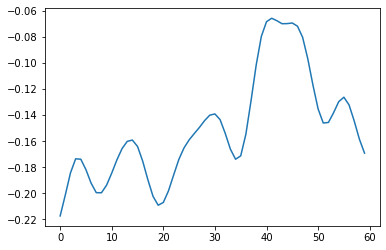

In [96]:
plt.plot(train_data[130,0,:,0])

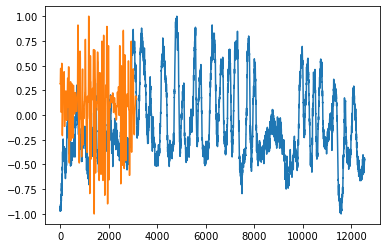

In [97]:
buffer=6
plt.plot(np.array((data_augment(tr[buffer], True))))
plt.plot(normalize_data(diff_tr[buffer]))

In [64]:
tr, diff_tr = get_trace(0)[unique_neuron_indices(0)], get_diff_trace(0)[unique_neuron_indices(0)]


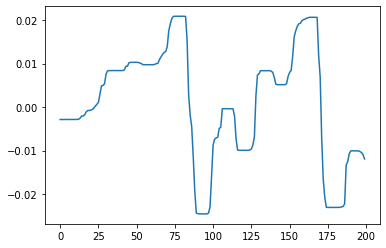

In [102]:
plt.plot(diff_tr[0,0:200])

 np.std(tr[8][2200:2300])

In [4]:
[get_state_name(i+1) for i in range(8)]

['FWD', 'SLOW', 'DT', 'VT', 'REV1', 'REV2', 'REVSUS', 'NOSTATE']

In [134]:
get_states(0)

array([2, 2, 2, ..., 1, 1, 2], dtype=uint8)

In [141]:
unique, counts = np.unique(get_states(0), return_counts=True)
dict(zip(unique, counts))

{1: 681, 2: 625, 3: 172, 4: 334, 5: 107, 6: 143, 7: 1053, 8: 22}

In [144]:
get_states(0).shape

(3137,)

In [145]:
22/3137

0.007013069811922219